In [1]:
##############################################################################################
############BIOM/SYSC 5405, Pattern Classificaiton and Experimental Design####################
############################## Project 5405## ################################################
################################### TUHEEN AHMMED, Nov 29, 2021 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



import pandas as pd
import csv
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# max rows and columns##
pd.set_option('display.max_rows', None)

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#confusion matrix#
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#######ROC########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

#####P-R curve ####

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

########## plotpy #######
import plotly_express as px
import plotly.graph_objects as go

###counter####
from collections import Counter


In [2]:
###### (a)data visualization########## 
##load data, read a csv file, last two labels KIBA and label
## if kiba > 12.1 label = TRUE 
## if kiba < 12.1 label = FALSE

drug = pd.read_csv("train_data_smote.csv")

In [3]:
##### 109479 rows and 338 columns
##### actual class last two columns; Kiba nad label 
##### datatypes, all are float64, KIBA=float64, Label=bool

drug.shape
drug.head()
drug.tail()

#data inspection after csv file importing 
drug.dtypes
drug.head()

,G26,G26_Target Sequence_in_SMILES_perc,G26_SMILES_in_Target Sequence_perc,G26_ARRO,G26_SMILES_base,G26_SMILES_base_perc,G26_Target Sequence_base,G26_Target Sequence_base_perc,G26_fdp_SMILES_base,G26_fdp_Target Sequence_base,...,G10_Target Sequence_base,G10_Target Sequence_base_perc,G10_fdp_SMILES_base,G10_fdp_Target Sequence_base,G10_fd_SMILES_base,G10_fd_Target Sequence_base,G10_std_SMILES_dist,G10_std_Target Sequence_dist,KIBA,Label
0,5.073946,0.954991,0.062554,16.739510,5.522422,0.105597,5.062549,0.098782,-0.849394,0.036227,...,5.645625,0.120050,-0.024235,-0.640176,-0.004603,-0.058854,0.538344,-0.688681,11.900001,False
1,6.826617,0.001154,0.014306,60569.338400,5.590014,0.091748,6.158633,0.126360,0.090594,0.112054,...,5.589494,0.122443,-0.261973,-0.644310,-0.019836,-0.060652,0.032666,-0.720316,11.699999,False
2,5.177106,0.818811,0.930755,1.312142,5.556566,0.128679,5.564309,0.099924,-0.690133,-0.830831,...,5.549520,0.117385,-0.346797,-0.768549,-0.024956,-0.071758,-0.112331,-1.020784,11.300000,False
3,5.179001,0.183497,0.970300,5.616494,5.258327,0.130410,5.683928,0.086053,-0.053087,-0.884247,...,5.784208,0.118799,0.045586,-0.755603,0.018378,-0.067145,1.285098,-0.965758,11.800001,False
4,5.822746,0.029429,0.326915,103.942684,5.621003,0.101558,5.896788,0.281712,0.072129,-0.045202,...,5.631512,0.120159,-0.181766,-0.524913,-0.015458,-0.051385,0.119600,-0.458659,11.600000,False


In [4]:
#############################################################################################################
####################### Stratified Train-Test Splits for classification, 80/20 (train/test split)############
#############################################################################################################

from sklearn.model_selection import train_test_split

X= drug.drop(columns= ['KIBA' , 'Label'])
y= drug['Label']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# summarize first 5 rows
##print(X_train)
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# summarize first 5 rows
##print(X_train)
#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(109479, 336) (109479,)


In [5]:
X_train.shape

(87583, 336)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87583, 336)
(21896, 336)
(87583,)
(21896,)


In [8]:
#X_train, X_test, y_train, y_test 
####### train-test split -- 80/20 #######
#ratio = 3.72
# 86324/23155 =3.72
# 69059/18524 =3.72
#17265/4631 = 3.72

print('Dataset: Class0(False)=%d, Class1(True)=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0(False)=%d, Class1(True)=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0(False)=%d, Class1(True)=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))


Dataset: Class0(False)=86324, Class1(True)=23155
Train: Class0(False)=69059, Class1(True)=18524
Test: Class0(False)=17265, Class1(True)=4631


Class 0: 86324
Class 1: 23155
Proportion: 3.73 : 1


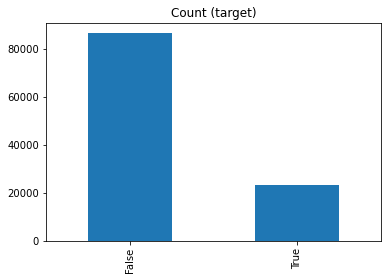

In [7]:
target_count = drug.Label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [9]:
# check version number

import imblearn
print(imblearn.__version__)

0.8.1


In [10]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({False: 86324, True: 23155})


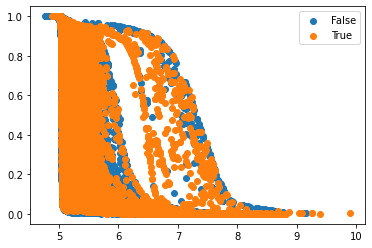

In [189]:
# scatter plot of examples by class label
from numpy import where

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(87583, 336) (87583,) (21896, 336) (21896,)


In [16]:
# transform the dataset
# https://imbalanced-learn.org/stable/over_sampling.html
#########
from imblearn.over_sampling import SMOTE, ADASYN

oversampled = SMOTE(random_state = 1)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(138118, 336) (138118,)


In [18]:
print(sorted(Counter(y_train_smote).items()))
print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

[(False, 69059), (True, 69059)]
(138118, 336)
(21896, 336)
(138118,)
(21896,)


In [19]:
y_train_smote.value_counts()

True     69059
False    69059
Name: Label, dtype: int64

In [22]:
##########################################################
##############  Linear Discriminant Analysis-SMOTE #############
##########################################################
# evaluate a lda model on the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


clf_lda = LinearDiscriminantAnalysis()
lda_model = clf_lda.fit(X_train_smote, y_train_smote)
y_pred_smote = lda_model.predict(X_test)



In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer

In [27]:
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_smote).ravel()
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_smote)
avg_precision = average_precision_score(y_test, y_pred_smote)

row = {'model': 'LDA with SMOTE',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_pre': round(avg_precision,3),       
    }

In [28]:
df_result = df_result.append(row, ignore_index=True)
df_result.head()

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,LDA with SMOTE,3085,12337,4928,1546,15422,6474,0.70433,0.384999,0.666163,0.487978,0.690365,0.327


Linear Discriminant Analysis PR AUC, SMOTE: 0.475


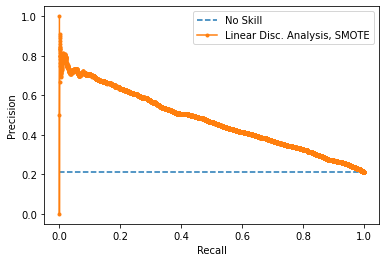

              x         y
0      1.000000  0.211500
1      0.999784  0.211464
2      0.999784  0.211473
3      0.999784  0.211483
4      0.999784  0.211493
5      0.999784  0.211502
6      0.999784  0.211512
7      0.999784  0.211522
8      0.999784  0.211531
9      0.999784  0.211541
10     0.999784  0.211551
11     0.999784  0.211560
12     0.999784  0.211570
13     0.999784  0.211580
14     0.999784  0.211589
15     0.999784  0.211599
16     0.999784  0.211609
17     0.999784  0.211618
18     0.999784  0.211628
19     0.999784  0.211638
20     0.999784  0.211647
21     0.999784  0.211657
22     0.999784  0.211667
23     0.999784  0.211676
24     0.999784  0.211686
25     0.999784  0.211696
26     0.999784  0.211706
27     0.999784  0.211715
28     0.999784  0.211725
29     0.999784  0.211735
30     0.999784  0.211744
31     0.999784  0.211754
32     0.999784  0.211764
33     0.999784  0.211773
34     0.999784  0.211783
35     0.999784  0.211793
36     0.999784  0.211802
37     0.999

In [38]:
#############################################################
###########Precision-recall curve with 336 features--modified##########
#A no-skill classifier is one that cannot discriminate between the classes and would predict a random class
#or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. 
#It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
#############################################################


# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(y_test[y_test==1]) / len(y_test)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Linear Disc. Analysis, SMOTE')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    
clf_lda = LinearDiscriminantAnalysis()
lda_model = clf_lda.fit(X_train_smote, y_train_smote)
y_pred_smote = lda_model.predict_proba(X_test)

#model_336_pr = LinearDiscriminantAnalysis(n_components= None)
#model_336_pr_final = model_336_pr.fit(X_train, y_train)
#yhat = model_336_pr_final.predict_proba(X_test)

#model_probs = yhat[:, 1]
model_probs = y_pred_smote[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Linear Discriminant Analysis PR AUC, SMOTE: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)


df = pd.DataFrame(dict(x = recall,y = precision))
df.to_csv('ldas.csv')
print(df)
#fig = px.line(df, x='x', y='y', title='Precision Recall Curve, LDA')
#fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
#                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))

In [33]:
stdev_smote = pd.read_csv("ldas.csv")

import statistics
statistics.stdev(stdev_smote.y)

0.1366138768900106

In [36]:
X_train.shape
X_test.shape

(21896, 336)

In [121]:
##########################################################
##############  Linear Discriminant Analysis #############
##########################################################
# evaluate a lda model on the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


#model_336 = LinearDiscriminantAnalysis(n_components= None)
#model_336.fit(X_train, y_train)
#X_train = model_336.fit_transform(X_train, y_train)
#X_test = model_336.transform(X_test)


#scores_final = cross_val_score(model_336, X_train, y_train, scoring='accuracy')
# summarize result
#print('Accuracy_train with std: %.3f (%.3f)' % (mean(scores_final), std(scores_final)))


#scores_final_test = cross_val_score(model_336, X_test, y_test, scoring='accuracy')
# summarize result
#print('Accuracy_test with std: %.3f (%.3f)' % (mean(scores_final_test), std(scores_final_test)))

accuracy for each fold with 336 featurs:: [0.69575933 0.70067781 0.70107652 0.70143898 0.70901446]
0.701593 accuracy with a standard deviation of 0.004248


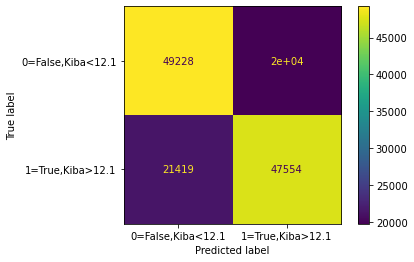

In [169]:
############################################################################
####################### confusion matrix with 5-fold CV#####################
############################################################################

y_pred_336 = cross_val_predict(clf_lda, X_train_new, y_train_new)
confusion_matrix_336 = confusion_matrix(y_train_new, y_pred_336)
cm_display_336 = ConfusionMatrixDisplay(confusion_matrix_336, display_labels=["0=False,Kiba<12.1", "1=True,Kiba>12.1"] ).plot()

#print(confusion_matrix_315)
scores_336 = cross_val_score(clf_lda, X_train_new, y_train_new, scoring = "accuracy")
print("accuracy for each fold with 336 featurs::", scores_336)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336.mean(), scores_336.std()))



accuracy for each fold with 21 featurs:: [0.80981735 0.80657684 0.81045901 0.8031514  0.80657684]
0.807316 accuracy with a standard deviation of 0.002630


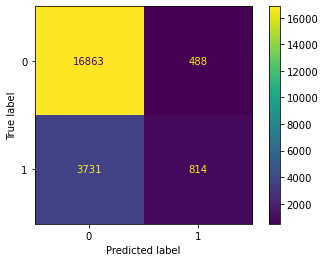

In [170]:
#### confusion matrix with test data, 21 best features #####

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#model_21 = LinearDiscriminantAnalysis(n_components= None)
#model_21.fit(best_features_selected, y_train)
#X_train = model_21.fit_transform(best_features_selected, y_train)
#X_test = model_21.transform(best_features_selected_test)

y_pred_336_test = cross_val_predict(model_336, X_test, y_test, cv =5)
confusion_matrix_336_test = confusion_matrix(y_test, y_pred_336_test)
cm_display_336_test = ConfusionMatrixDisplay(confusion_matrix_336_test).plot()

#print(confusion_matrix_315)

scores_336_test = cross_val_score(model_336, X_test, y_test, scoring = "accuracy")
print("accuracy for each fold with 21 featurs::", scores_336_test)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336_test.mean(), scores_336_test.std()))
#print(best_features_selected_test)
#best_features_selected_test.shape

In [171]:
###################Performance matrics######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_train_new, y_pred_336))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_train_new, y_pred_336))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_train_new, y_pred_336, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_train_new, y_pred_336, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_train_new, y_pred_336))

TN = 49175
TP = 47722
FP = 19884
FN = 21337

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[49228 19745]
 [21419 47554]]
accuracy:: 0.7015933771185826
precision:: [0.69681657 0.70660782]
sensitivity/recall:: [0.71372856 0.68945819]


              precision    recall  f1-score   support

       False       0.70      0.71      0.71     68973
        True       0.71      0.69      0.70     68973

    accuracy                           0.70    137946
   macro avg       0.70      0.70      0.70    137946
weighted avg       0.70      0.70      0.70    137946

sensitivity/TPR:: 0.6910323057096106
specificity/TNR:: 0.7120722860163049
precison/ PPV:: 0.7058840931278288
NPV:: 0.6973990242795552


In [173]:
###################Performance matrics, test data######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_test, y_pred_336_test))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_test, y_pred_336_test))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_test, y_pred_336_test, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_test, y_pred_336_test, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_test, y_pred_336_test))

TN = 16750
TP = 904
FP = 515
FN = 3727

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[16863   488]
 [ 3731   814]]
accuracy:: 0.8073164048227987
precision:: [0.81883073 0.62519201]
sensitivity/recall:: [0.97187482 0.17909791]


              precision    recall  f1-score   support

       False       0.82      0.97      0.89     17351
        True       0.63      0.18      0.28      4545

    accuracy                           0.81     21896
   macro avg       0.72      0.58      0.58     21896
weighted avg       0.78      0.81      0.76     21896

sensitivity/TPR:: 0.19520621895918808
specificity/TNR:: 0.9701708659136983
precison/ PPV:: 0.6370683579985905
NPV:: 0.8179909166381795


In [175]:
#############################################################
###########Precision-recall curve with 336 features##########
#############################################################

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

model_336 = LinearDiscriminantAnalysis(n_components= None)
model_336.fit(X_train_new, y_train_new)
X_train = model_336.fit_transform(X_train_new, y_train_new)
X_test = model_336.transform(X_test)


scores_final = cross_val_score(model_336, X_train_new, y_train_new, scoring='accuracy')
# summarize result
print('Accuracy: %.3f (%.3f)' % (mean(scores_final), std(scores_final)))


model_336_pr = LinearDiscriminantAnalysis()
model_336_pr.fit(X_train_new, y_train_new)
y_pred_336_pr = cross_val_predict(model_336_pr, X_train_new, y_train_new, cv = 7)

display = PrecisionRecallDisplay.from_predictions(y_train_new, y_pred_336_pr, name="LDA, 5-fold CV")
_ = display.ax_.set_title("Precision-Recall curve # 336 features")



from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_train_new, y_pred_336_pr)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)
auc_score = auc(recall, precision)

/Users/tuheenahmmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



ValueError: X has 1 features, but LinearDiscriminantAnalysis is expecting 336 features as input.

In [174]:
#############################################################
###########Precision-recall curve with 336 features--modified##########
#A no-skill classifier is one that cannot discriminate between the classes and would predict a random class
#or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. 
#It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
#############################################################


#model_336 = LinearDiscriminantAnalysis(n_components= None)
#model_336.fit(X_train_new, y_train_new)
#X_train = model_336.fit_transform(X_train_new, y_train_new)
#X_test = model_336.transform(X_test)


#model_336_pr = LinearDiscriminantAnalysis()
#model_336_pr.fit(X_train, y_train)
#y_pred_336_pr = cross_val_predict(model_336_pr, X_train, y_train, cv = 7)

#display = PrecisionRecallDisplay.from_predictions(y_train, y_pred_336_pr, name="LDA, 5-fold CV")
#_ = display.ax_.set_title("Precision-Recall curve # 336 features")


# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(y_test[y_test==1]) / len(y_test)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Linear Disc. Analysis')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    

model_336_pr = LinearDiscriminantAnalysis(n_components= None)
model_336_pr.fit(X_train_new, y_train_new)
yhat = model_336_pr.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Linear Discriminant Analysis PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)


df = pd.DataFrame(dict(x = recall,y = precision))
#df.to_csv('lda.csv')
#print(df)
fig = px.line(df, x='x', y='y', title='Precision Recall Curve, LDA')
fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))




/Users/tuheenahmmed/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



ValueError: X has 1 features, but LinearDiscriminantAnalysis is expecting 336 features as input.